In [216]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

**Creating dataframe from telicom_csv file**

In [217]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [219]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [221]:
df.drop(columns= ['customerID'], axis=1, inplace=True)

# HYPOTESIS TEST for  independence testing for Initial feature selection and dependency on Y

In [222]:
x_hypo=df.drop('Churn',axis=1)
x_hypo
y_hypo=df['Churn']

In [223]:
p_values = []
from scipy.stats import chi2_contingency
for feature in x_hypo.columns:
    contingency_table = pd.crosstab(x_hypo[feature], y_hypo)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(p)
selected_features = x_hypo.columns[np.argsort(p_values)[:20]]

# Use the selected features for prediction or classification
selected_features

Index(['Contract', 'OnlineSecurity', 'TechSupport', 'tenure',
       'InternetService', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection',
       'StreamingMovies', 'StreamingTV', 'PaperlessBilling', 'Dependents',
       'SeniorCitizen', 'Partner', 'MonthlyCharges', 'MultipleLines',
       'PhoneService', 'gender', 'TotalCharges'],
      dtype='object')

# Visulising the data with respect to churn

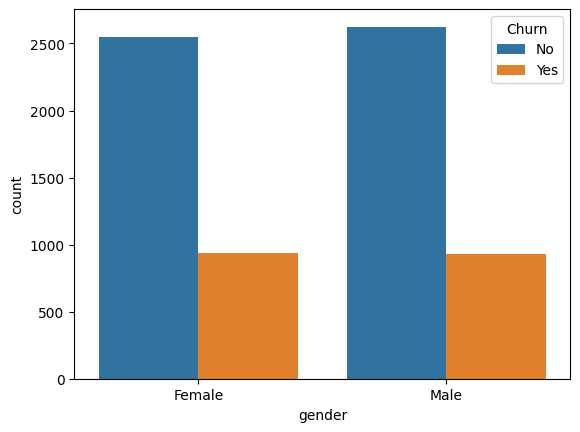

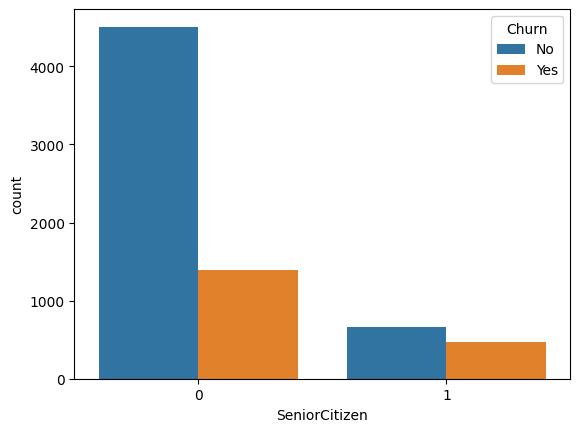

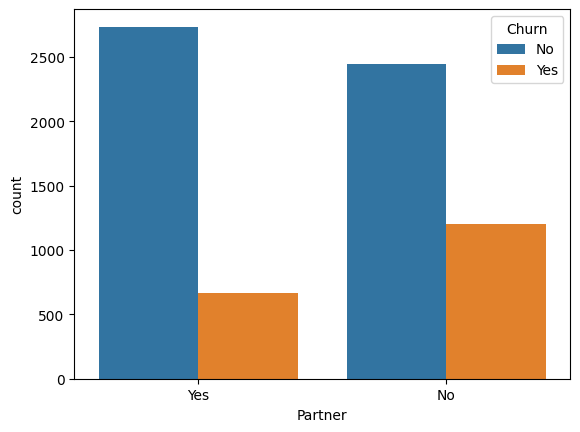

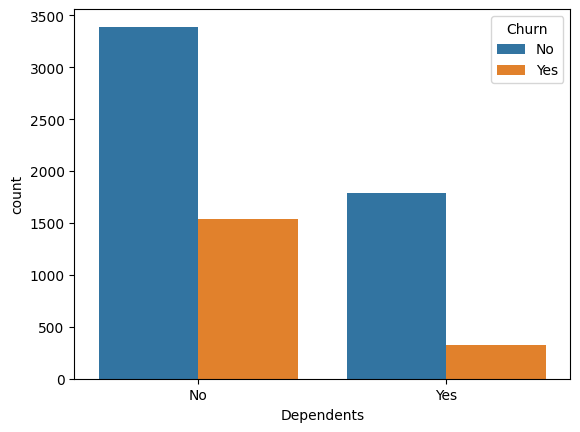

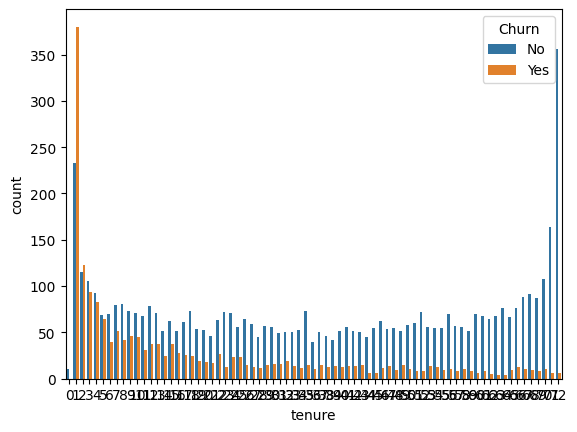

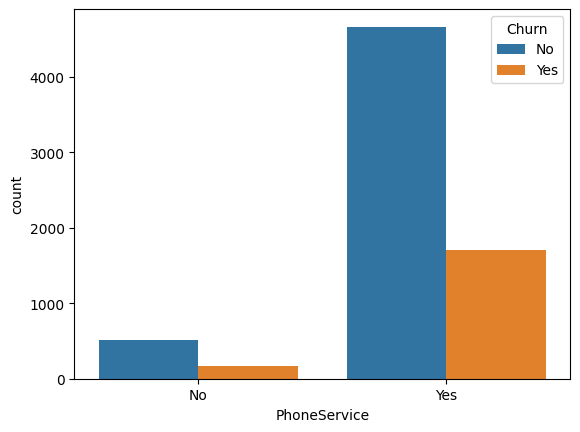

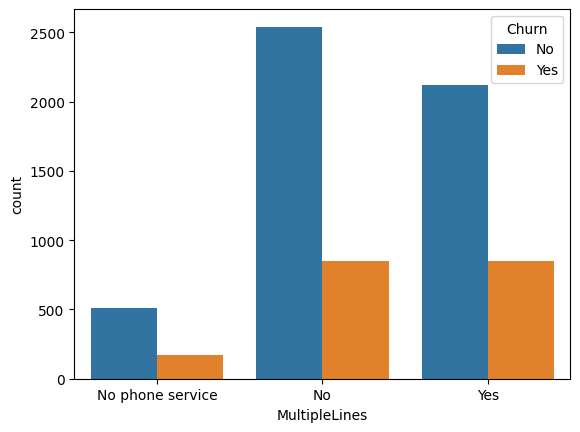

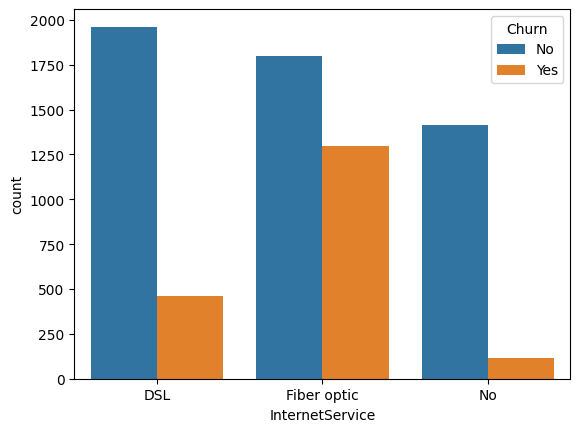

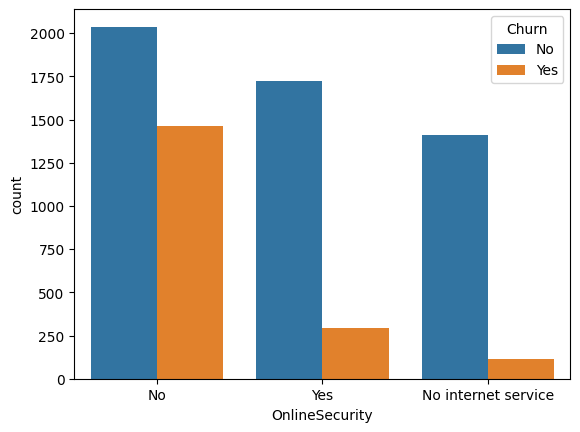

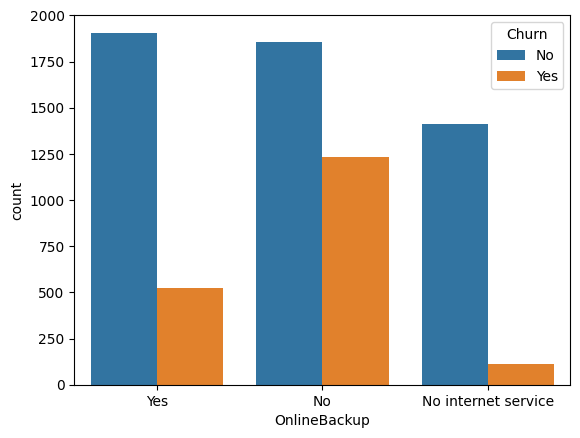

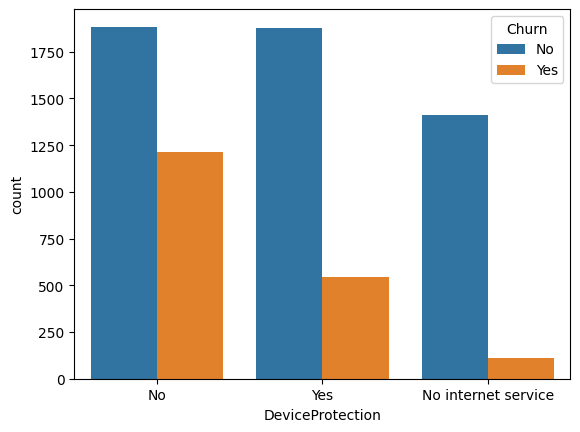

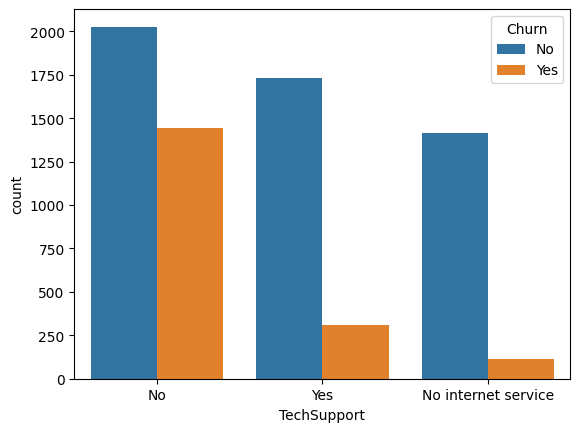

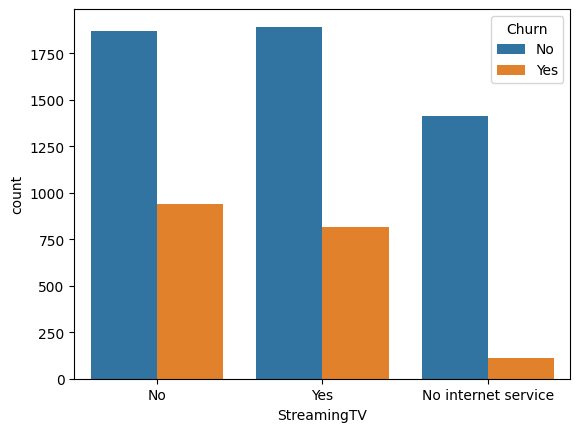

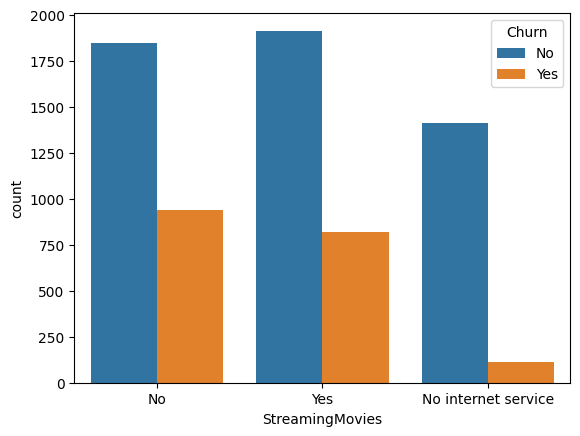

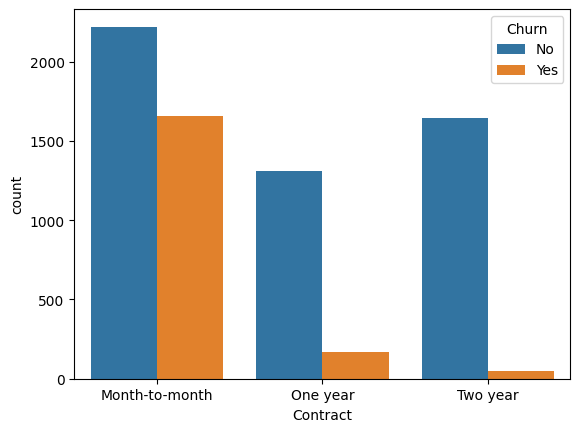

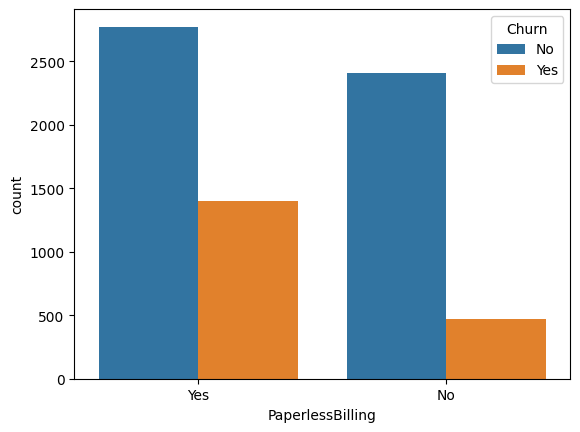

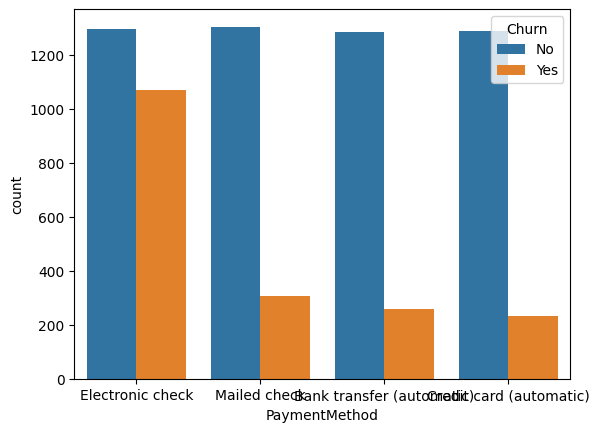

In [224]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(df,x=predictor, hue='Churn')

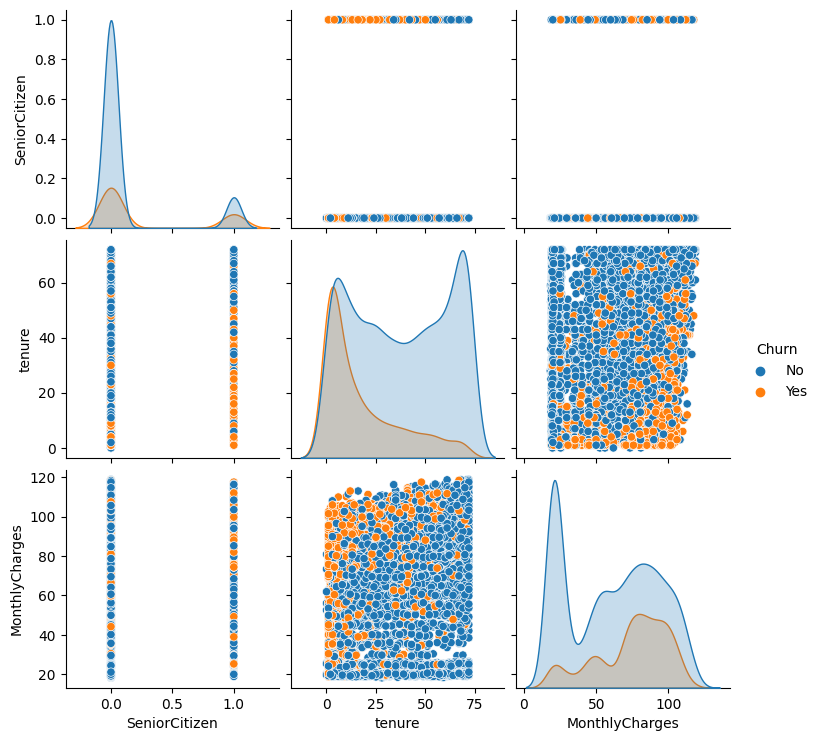

In [225]:
sns.pairplot(data=df, hue='Churn')
plt.show()

**Based on the image above, we can see that there are a number of clear separations in the data. This can be quite helpful in splitting our data into pure splits using a decision tree classifier.**

# NULL value Handling

In [226]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [227]:
df.dropna(how = 'any', inplace = True)

# Converting features from categorical to Binary form

In [228]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
telco_data_dummies = pd.get_dummies(df,drop_first=True)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


**Features after Converting features from categorical to Binary form**

In [229]:
for col in telco_data_dummies.columns:
    print(col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges
Churn
gender_Male
Partner_Yes
Dependents_Yes
PhoneService_Yes
MultipleLines_No phone service
MultipleLines_Yes
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_One year
Contract_Two year
PaperlessBilling_Yes
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


# Correlation Analysis 

<Axes: >

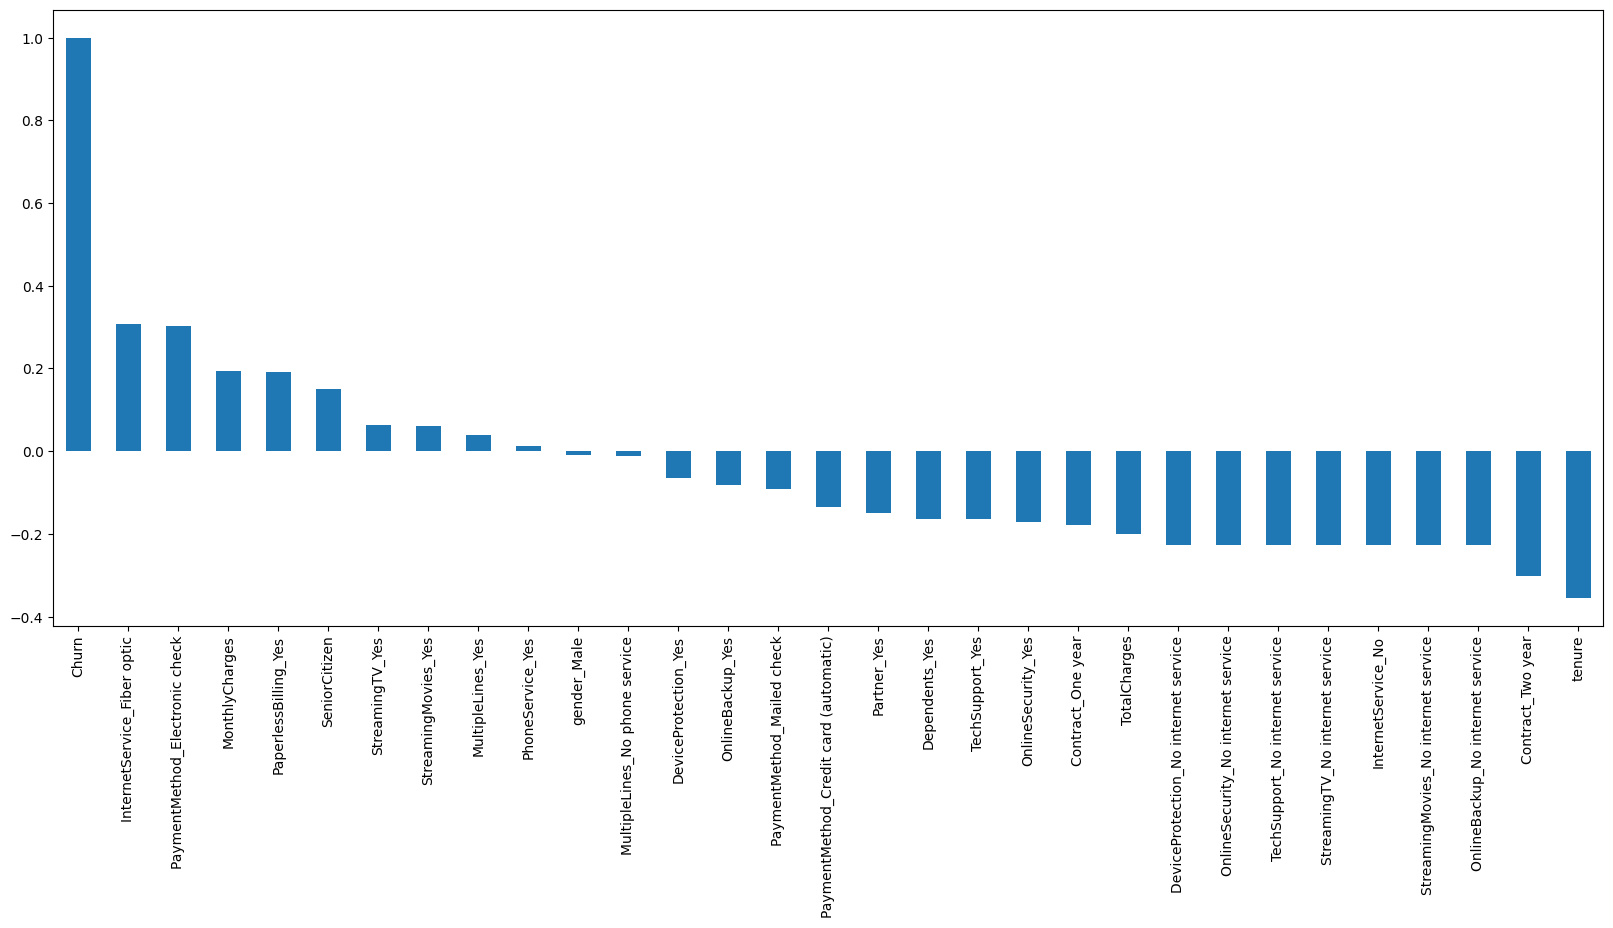

In [230]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

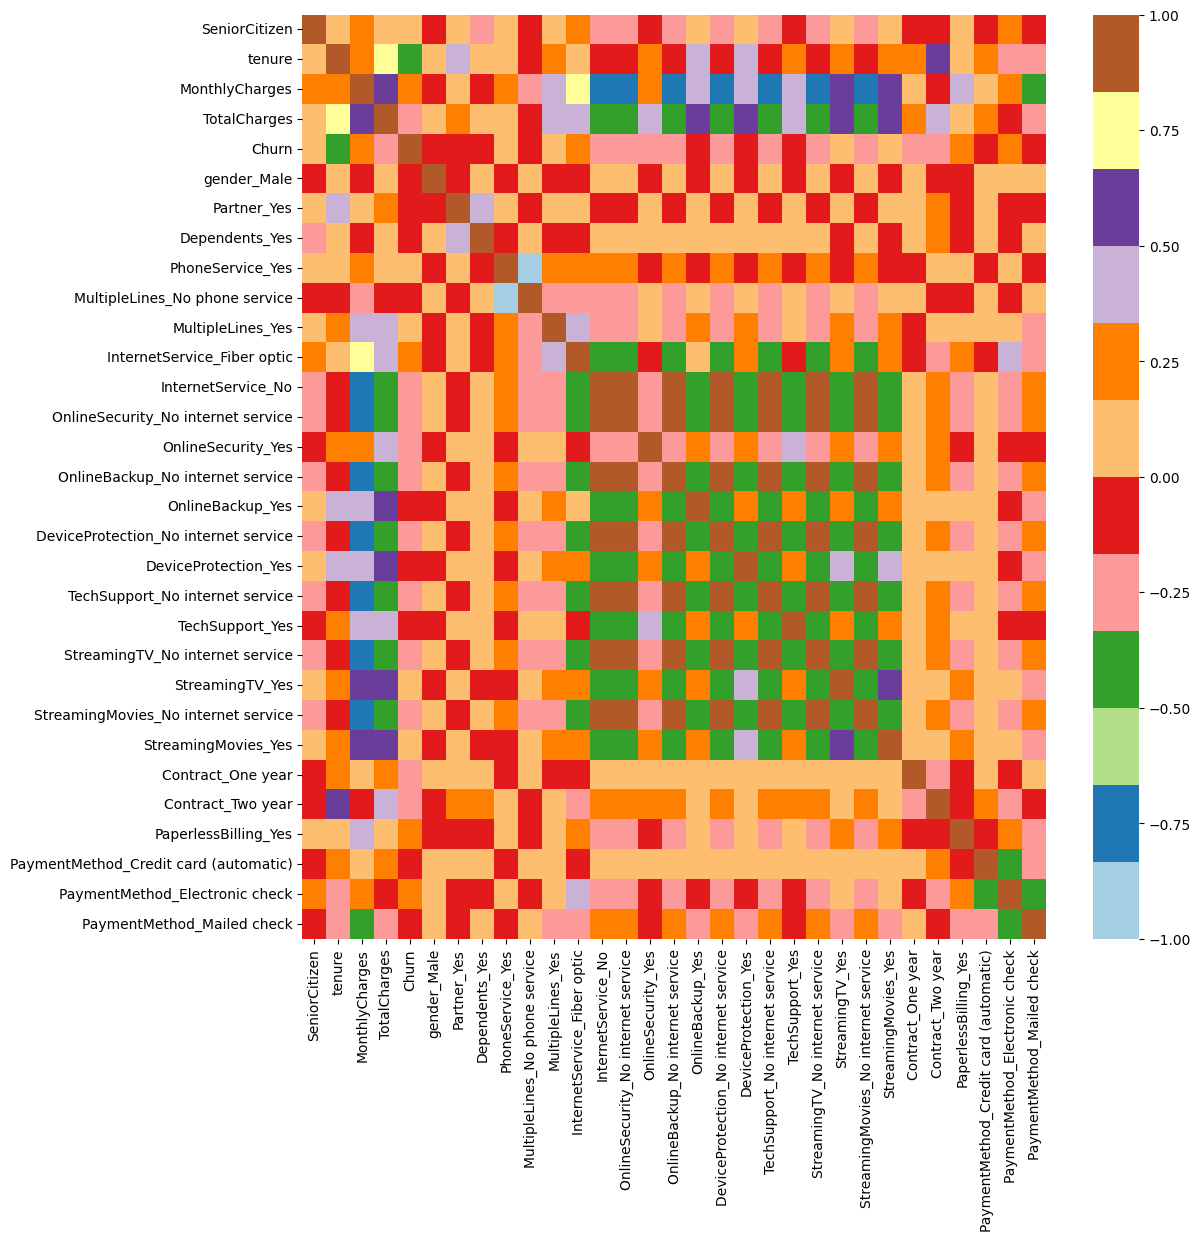

In [231]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [232]:
x=telco_data_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [233]:
y=telco_data_dummies.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# Fitting the model by decision tree

Divinding the data into training and testing data 
training =70% and testing=30%

In [234]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [235]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN as sm
from sklearn import metrics

In [236]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [237]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [238]:
model_dt.score(x_test,y_test)

0.7800947867298578

In [239]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1568
           1       0.61      0.39      0.47       542

    accuracy                           0.78      2110
   macro avg       0.71      0.65      0.67      2110
weighted avg       0.76      0.78      0.76      2110



In [240]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1437  131]
 [ 333  209]]


we are improvening model accuracy , by fitting smooting ,means apan sabhi features ko standarized kar rahe hai ,
kyuki model imbalanced hai .....

In [241]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(x,y)

In [242]:
xnew_train,xnew_test,ynew_train,ynew_test=train_test_split(X_resampled,y_resampled,test_size=0.3)

In [243]:
modelnew_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=8, min_samples_leaf=8)
modelnew_dt.fit(xnew_train,ynew_train)
ynew_pred=model_dt.predict(xnew_test)
modelnew_dt.score(xnew_test,ynew_test)
print(classification_report(ynew_test, ynew_pred, labels=[0,1]))
print(metrics.confusion_matrix(ynew_test, ynew_pred))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       784
           1       0.98      0.56      0.71       961

    accuracy                           0.75      1745
   macro avg       0.81      0.77      0.75      1745
weighted avg       0.83      0.75      0.74      1745

[[775   9]
 [426 535]]


**Aisa karne se model ki accuracy improve ho gayi  gayi hai **

In [244]:
modelnew_dt.score(xnew_test,ynew_test)

0.9340974212034384

# **Hyper parameter Tuning **

In [245]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 6, 8, 10],
              'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

# Instantiate the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.4, 'min_samples_leaf': 2, 'splitter': 'random'}


In [246]:
from sklearn.metrics import recall_score, accuracy_score
recall = recall_score(y_test, y_pred)
specificity = accuracy_score(y_test, y_pred, normalize=True)
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")

Recall (Sensitivity): 0.386
Specificity: 0.780


# **These are all business or tree rules**

In [247]:
from sklearn.tree import export_text
tree_rules = export_text(modelnew_dt, feature_names=telco_data_dummies.columns.tolist()[:-1])
# Print the tree rules
print(tree_rules)

|--- tenure <= 17.50
|   |--- InternetService_No <= 0.50
|   |   |--- OnlineSecurity_No internet service <= 0.50
|   |   |   |--- StreamingMovies_Yes <= 0.50
|   |   |   |   |--- MonthlyCharges <= 69.44
|   |   |   |   |   |--- TotalCharges <= 315.07
|   |   |   |   |   |   |--- TechSupport_No internet service <= 0.50
|   |   |   |   |   |   |   |--- MonthlyCharges <= 45.39
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- MonthlyCharges >  45.39
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- TechSupport_No internet service >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TotalCharges >  315.07
|   |   |   |   |   |   |--- tenure <= 14.50
|   |   |   |   |   |   |   |--- OnlineBackup_No internet service <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- OnlineBackup_No internet service >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- t

# **Visualising Tree IN Image format for better understaning**

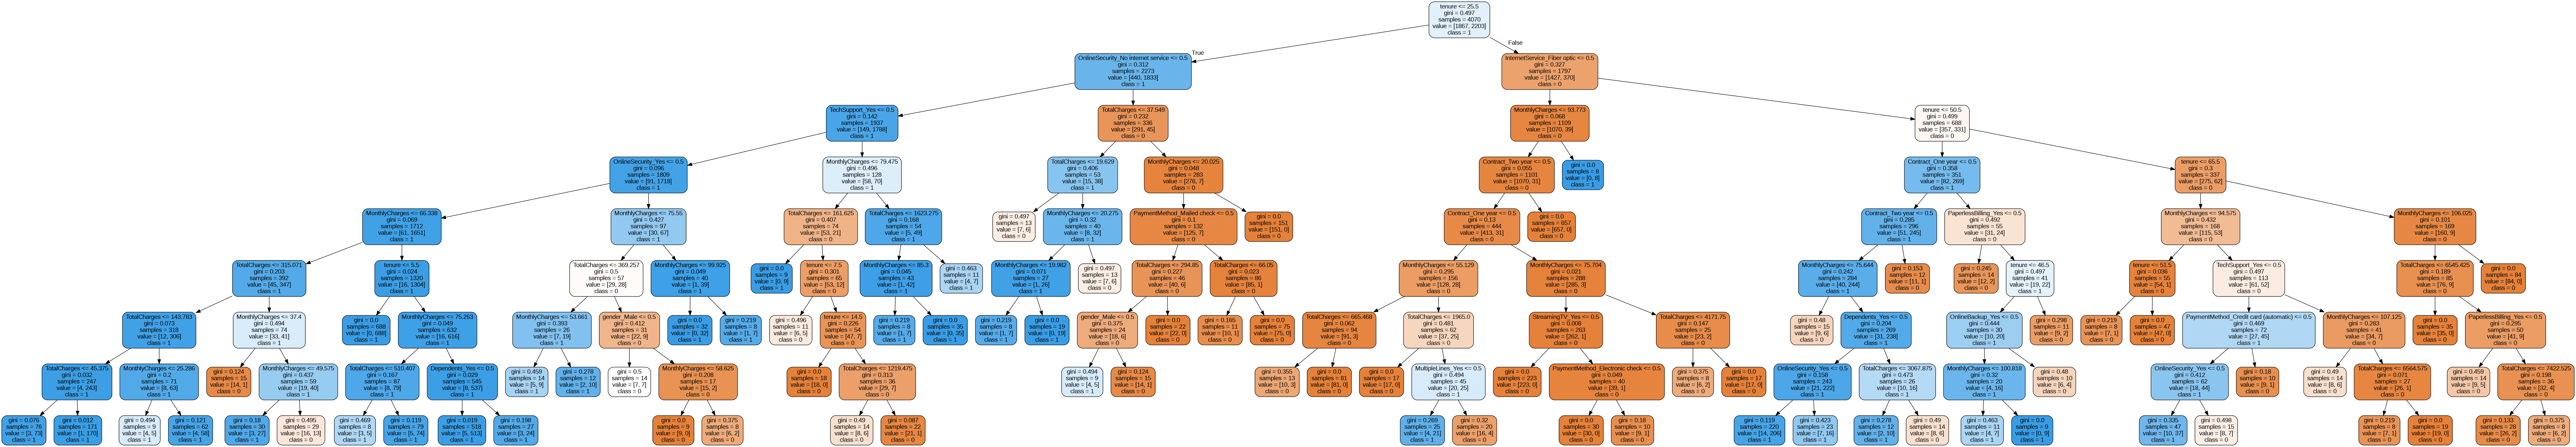

In [248]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
export_graphviz(modelnew_dt, out_file="my_tree.dot", feature_names=x_train.columns, class_names=["0", "1"], filled=True, rounded=True)

# Convert .dot file to image format
s = Source.from_file("my_tree.dot")
s.format = "png"
s.render("my_tree")
from IPython.display import Image
Image(filename='my_tree.png')

**Busenese rules associate with decision tree**

# Feature Impotences and analysis and Feature selection which has higher Importence

---



In [249]:
#feature_imp=feature_importance.sort_values("importence",ascending=false)
modelnew_dt.feature_importances_
importance_list=list(modelnew_dt.feature_importances_)
modelnew_dt.feature_importances_


array([0.00000000e+00, 5.21099134e-01, 5.41434530e-02, 7.59179484e-02,
       1.02527574e-03, 1.03657786e-03, 1.28066036e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.43934816e-01, 0.00000000e+00,
       1.30391841e-01, 1.76447947e-02, 0.00000000e+00, 6.68879615e-03,
       0.00000000e+00, 2.85516322e-03, 0.00000000e+00, 6.59757850e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.42942849e-03,
       1.80800314e-02, 7.33684659e-03, 1.75376609e-03, 4.44691449e-03,
       3.19470865e-04, 1.75024281e-05])

In [250]:
Feature_imp=pd.DataFrame({"Feature_name":x_train.columns,"IMPORTANCE":importance_list})
Feature_imp

,Feature_name,IMPORTANCE
0,SeniorCitizen,0.000000
1,tenure,0.521099
2,MonthlyCharges,0.054143
3,TotalCharges,0.075918
4,gender_Male,0.001025
5,Partner_Yes,0.001037
6,Dependents_Yes,0.001281
7,PhoneService_Yes,0.000000
8,MultipleLines_No phone service,0.000000
9,MultipleLines_Yes,0.000000


# **WE only consider those feature which has higher importence for final model deployment**

# New **There is no need for feature selection in decision tree so we dont go for feature selection in decision tree**

In [251]:
xl_train,xl_test,yl_train,yl_test=train_test_split(x,y,test_size=0.3)

# **Fitting the model by logistic regression**
Logistic regression me fit karne se pahle hume sabhi features ko stanadrized karna padega , hum standardscakler ki help se sabhi features ka mean(avg)=0;
or std(stanadrd deviation)=1 karenge fir model ko fit karenge


In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc_x = StandardScaler()
xr_train= sc_x.fit_transform(xl_train)
xr_test = sc_x.transform(xl_test)
classifier = LogisticRegression()
classifier.fit(xl_train, yl_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [253]:
ylg_pred = classifier.predict(xl_test)
ylg_pred

array([0, 0, 1, ..., 0, 0, 1])

In [254]:
cm = confusion_matrix(yl_test, y_pred)
cm

array([[1299,  269],
       [ 471,   71]])

In [255]:
classifier.score(xl_test,yl_test)

0.8232227488151659

In [256]:
from sklearn.metrics import recall_score, accuracy_score
recall = recall_score(yl_test, ylg_pred)
specificity = accuracy_score(yl_test, ylg_pred, normalize=True)
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")

Recall (Sensitivity): 0.566
Specificity: 0.823


NOTE :---- data imbalaced hai isliye decision tree me smoteen or logistic regression me  Standard scaler ka use kiya hai

**Roc curve for logistic regression 
P(P(Y=1)>P(Y=0))=AUC**


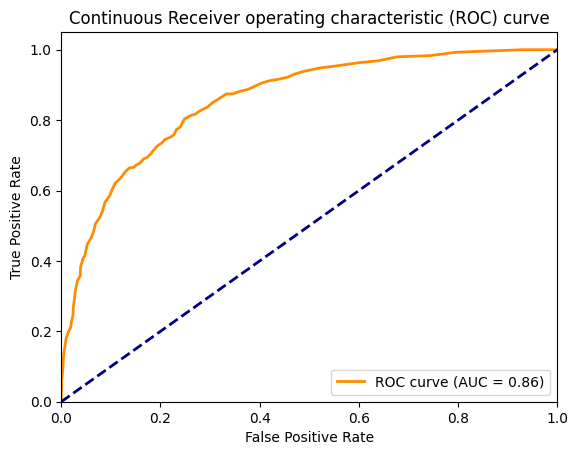

In [257]:
thresholds = np.arange(0, 1.01, 0.01)
from sklearn.metrics import roc_curve, auc
y_prob = classifier.predict_proba(xl_test)[:,1]
# Calculate true positive rates and false positive rates for each threshold
tpr = []
fpr = []
for thresh in thresholds:
    y_pred = np.where(y_prob >= thresh, 1, 0)
    tn, fp, fn, tp = confusion_matrix(yl_test, y_pred).ravel()
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Continuous Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
#This code creates an array of decision thresholds from 0 to 1 in increments of 0.01, calculates the true positive rates and false positive rates for each threshold, and then plots the resulting ROC curve. Note that in practice, you may want to use more granular increments for the decision threshold to obtain a smoother curve.


# Feature Selection in logistic regression

In [258]:
coef = classifier.coef_[0]
feature_names = list(x_train.columns)

# sort the coefficients by their absolute values
sorted_idx = abs(coef).argsort()[::-1]
Feature_imp=pd.DataFrame({"Feature_name":x_train.columns,"IMPORTANCE":importance_list})
Feature_imp

# print the feature names and coefficients
# for idx in sorted_idx:
#     print(f"{feature_names[idx]}: {coef[idx]}")

,Feature_name,IMPORTANCE
0,SeniorCitizen,0.000000
1,tenure,0.521099
2,MonthlyCharges,0.054143
3,TotalCharges,0.075918
4,gender_Male,0.001025
5,Partner_Yes,0.001037
6,Dependents_Yes,0.001281
7,PhoneService_Yes,0.000000
8,MultipleLines_No phone service,0.000000
9,MultipleLines_Yes,0.000000


SeniorCitizen
    MonthlyCharges
    TotalCharges
    gender
    Partner
    Dependents
    PhoneService
    MultipleLines
    InternetService
    OnlineSecurity
    OnlineBackup
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
    Contract
    PaperlessBilling
    PaymentMethod
    tenure

**ROC curve is around 0.84 so this model is also good but accuracy is not too much good**